In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [71]:
data = pd.read_csv("Online+Retail.csv",sep=',', encoding="ISO-8859-1", header=0)

In [72]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [73]:
data.shape

(541909, 8)

In [74]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [75]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Clean the Data

In [76]:
round(100*(data.isnull().sum()/len(data)),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [77]:
data=data.dropna()

In [78]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [79]:
data.shape

(406829, 8)

In [80]:
data['amount']=data['Quantity']*data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [81]:
grpdf=data.groupby('CustomerID')['amount'].sum()

In [82]:
grpdf=grpdf.reset_index()

In [83]:
grpdf.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [84]:
#frequency
freq=data.groupby('CustomerID')['InvoiceNo'].count()
freq=freq.reset_index()
freq.columns=['CustomerID','freq']
freq.head()

,CustomerID,freq
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [85]:
freq.loc[freq['CustomerID']==17850.0]

,CustomerID,freq
4048,17850.0,312


In [86]:
grpdf= pd.merge(grpdf,freq, on='CustomerID',how='inner')

In [87]:
grpdf.head()

,CustomerID,amount,freq
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [88]:
#Recency

In [89]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [90]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [92]:
maxdate= max(data['InvoiceDate'])
maxdate

Timestamp('2011-12-09 12:50:00')

In [93]:
data['datediff']= maxdate-data['InvoiceDate']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,datediff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [94]:
last_purchase = data.groupby('CustomerID')['datediff'].min()

In [95]:
last_purchase = last_purchase.reset_index()
last_purchase.head()

,CustomerID,datediff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [96]:
grpdf=pd.merge(grpdf,last_purchase,on='CustomerID', how ='inner')

In [97]:
grpdf.columns=['CustomerID','Monetary','Frequency','Recency']

In [98]:
grpdf

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00
...,...,...,...,...
4367,18280.0,180.60,10,277 days 02:58:00
4368,18281.0,80.82,7,180 days 01:57:00
4369,18282.0,176.60,13,7 days 01:07:00
4370,18283.0,2094.88,756,3 days 00:48:00


In [99]:
grpdf['Recency']=grpdf['Recency'].dt.days
#grpdf.head()

In [100]:
grpdf.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Outlier treatment

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb64d45b5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb64d45ba30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb64d45b0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb64d45b310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb64d288400>],
 'means': []}

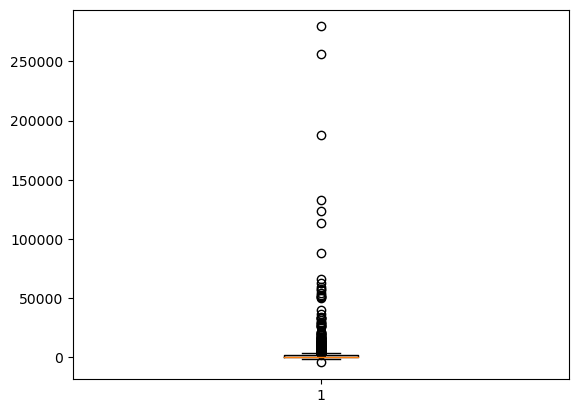

In [101]:
plt.boxplot(grpdf['Monetary'])

In [102]:
grpdf.shape

(4372, 4)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb64d324190>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb64d324b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb63bf4a970>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb64d324df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb64cf538b0>],
 'means': []}

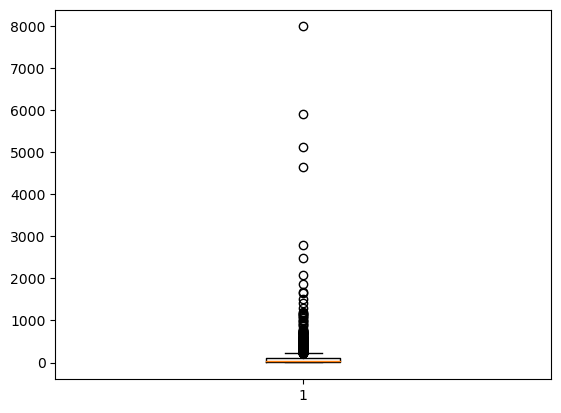

In [103]:
 plt.boxplot(grpdf['Frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb64e69d100>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb6586e5250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb64e69dd90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb6586e56d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb6586e5e80>],
 'means': []}

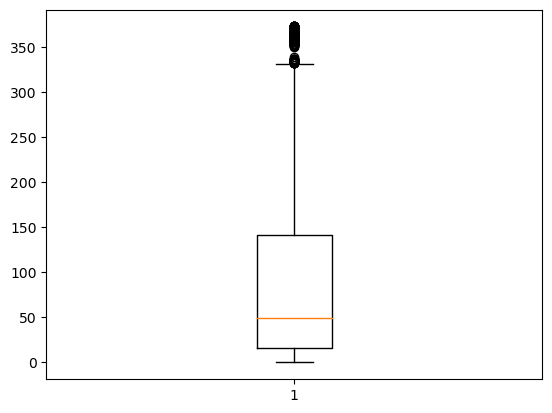

In [104]:
 plt.boxplot(grpdf['Recency'])

Rescaling

In [105]:
rfm_df= grpdf[['Monetary','Frequency','Recency']]

In [106]:
rfm_df.head()

,Monetary,Frequency,Recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [107]:
scaler=StandardScaler()

In [108]:
rfm_scaled=scaler.fit_transform(rfm_df)

In [109]:
rfm_scaled

array([[-0.23100099, -0.3917197 ,  2.32202285],
       [ 0.29343167,  0.38265697, -0.89373323],
       [-0.01231622, -0.26695902, -0.1691956 ],
       ...,
       [-0.20951263, -0.34439668, -0.83418219],
       [ 0.02390005,  2.85205812, -0.87388289],
       [-0.00744423, -0.0991774 , -0.48680114]])

In [138]:
rfm_scaled=pd.DataFrame(rfm_scaled)

In [139]:
rfm_scaled.columns=['m','f','r']

# KMeans

In [112]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_scaled)

KMeans(max_iter=50, n_clusters=4)

In [113]:
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

# Finding Optimal Cluster

In [114]:
#elbow curve/ssd
ssd = []

n = [2,3,4,5,6,7,8,9,10,11,12]
for num_clusters in n:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_scaled)
    ssd.append(kmeans.inertia_)

In [115]:
ssd

[8988.64449098161,
 5408.406395240116,
 4013.850168960059,
 2938.1058862829577,
 2323.156239457473,
 1861.9612275864044,
 1616.3934232269037,
 1469.1624204181671,
 1253.2220880772054,
 1135.659371260326,
 1025.895091138283]

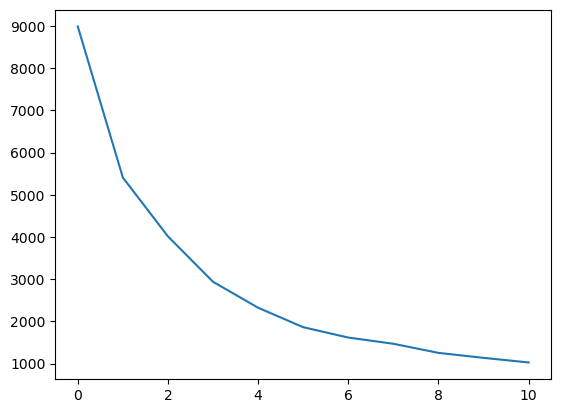

In [116]:
plt.plot(ssd)

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [117]:
ssd = []

n = [2,3,4,5,6,7,8,9,10,11,12]
for num_clusters in n:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=30)
    kmeans.fit(rfm_scaled)
    
    cluster_labels = kmeans.labels_
    ssd.append(kmeans.inertia_)
    # silhouette score
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.9344641162235822
For n_clusters=3, the silhouette score is 0.6003883114752382
For n_clusters=4, the silhouette score is 0.5976589015612324
For n_clusters=5, the silhouette score is 0.6149580516850672
For n_clusters=6, the silhouette score is 0.5856955818362631
For n_clusters=7, the silhouette score is 0.5236888805995041
For n_clusters=8, the silhouette score is 0.501427195387517
For n_clusters=9, the silhouette score is 0.5039967699162894
For n_clusters=10, the silhouette score is 0.4276951656372348
For n_clusters=11, the silhouette score is 0.4276787904539349
For n_clusters=12, the silhouette score is 0.4280135949754686


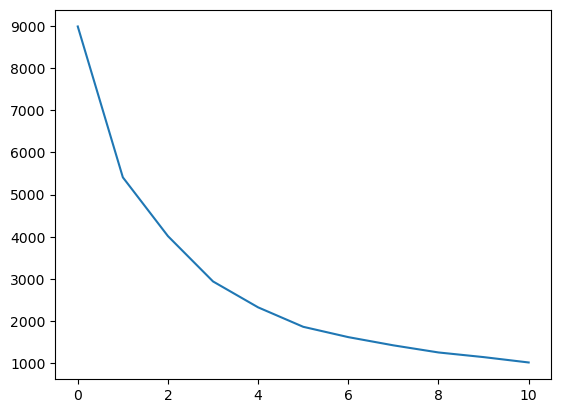

In [118]:
plt.plot(ssd)

In [119]:
# Final model qith 3 clusters
kmeans = KMeans(n_clusters=3,max_iter= 30)
kmeans.fit(rfm_scaled)

KMeans(max_iter=30, n_clusters=3)

In [120]:
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [121]:
grpdf['Cluster_ID']=kmeans.labels_
grpdf.head()

,CustomerID,Monetary,Frequency,Recency,Cluster_ID
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


<AxesSubplot:xlabel='Cluster_ID', ylabel='Recency'>

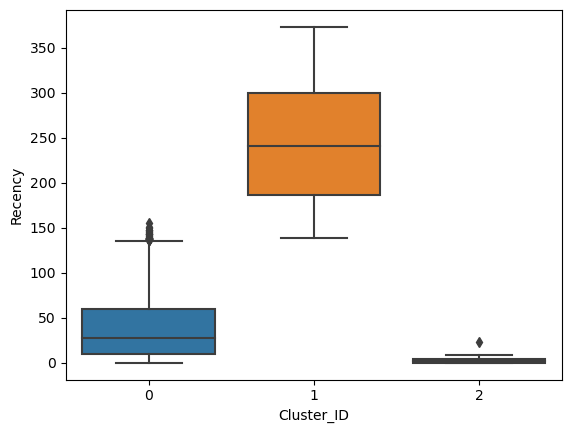

In [122]:
# plot
#sns.boxplot(x='Cluster_ID', y='Monetary', data=grpdf)
#sns.boxplot(x='Cluster_ID', y='Frequency', data=grpdf)
sns.boxplot(x='Cluster_ID', y='Recency', data=grpdf)

# Hierarchial Clustering

In [123]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [124]:
grpdf.head()

,CustomerID,Monetary,Frequency,Recency,Cluster_ID
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


In [141]:
rfm_scaled.shape

(4372, 3)

### Single linkage

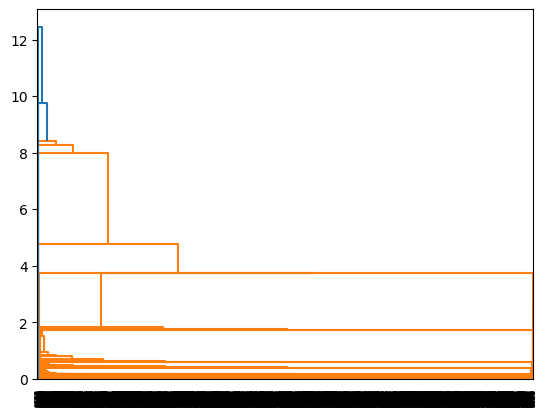

In [126]:
merge = linkage(rfm_scaled, method='single', metric='euclidean')
dendrogram(merge)
plt.show()

### Complete linkage

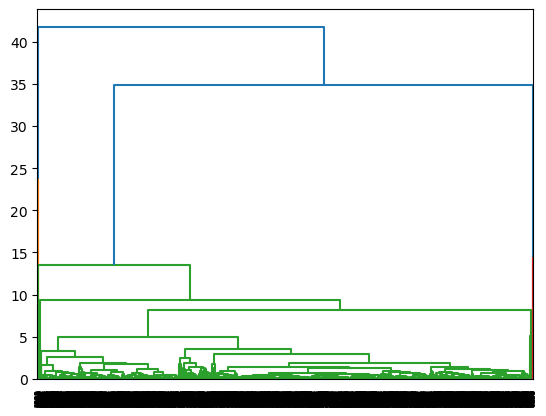

In [127]:
merge = linkage(rfm_scaled, method='complete', metric='euclidean')
dendrogram(merge)
plt.show()

In [147]:
cluster_lables=cut_tree(merge,n_clusters=3).reshape(-1,)

In [148]:
grpdf['Cluster_lable']=cluster_lables

<AxesSubplot:xlabel='Cluster_lable', ylabel='Monetary'>

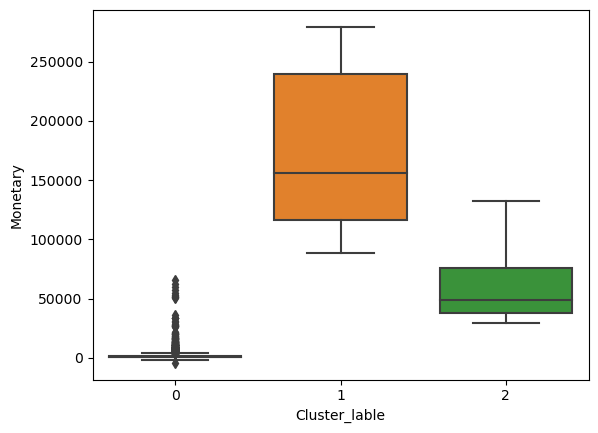

In [165]:
sns.boxplot(x='Cluster_lable', y='Monetary', data=grpdf)